# Python Pandas基础

## 产生Pandas对象

`pandas` 中有三种基本结构：

- `Series`
    - 1D labeled homogeneously-typed array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, also size-mutable array

##  Pandas一维数据结构：Series

`Series` 是一维带标记的数组结构，可以存储任意类型的数据（整数，浮点数，字符串，`Python` 对象等等）。

作为一维结构，它的索引叫做 `index`，基本调用方法为

    s = pd.Series(data, index=index)
    
其中，`data` 可以是以下结构：

- 字典
- `ndarray`
- 标量，例如 `5`

`index` 是一维坐标轴的索引列表。

如果 `data` 是个 `ndarray`，那么 `index` 的长度必须跟 `data` 一致：

In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series(np.ones(5), index=["a", "b", "c", "d", "e"])

s

a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
dtype: float64

In [3]:
s[0]

1.0

In [4]:
pd.Series(np.random.randn(5))

0    1.082435
1    0.680241
2    0.112977
3    0.901835
4   -0.603082
dtype: float64

In [5]:
pd.Series({1:2,})

1    2
dtype: int64

#### 向量化操作

简单的向量操作与 `ndarray` 的表现一致：

In [6]:
s + s

a    2.0
b    2.0
c    2.0
d    2.0
e    2.0
dtype: float64

In [7]:
s * 2

a    2.0
b    2.0
c    2.0
d    2.0
e    2.0
dtype: float64

但 `Series` 和 `ndarray` 不同的地方在于，\
`Series` 的操作默认是使用 `index` 的值进\
行对齐的，而不是相对位置：

In [8]:
s[1:] + s[:-1]

a    NaN
b    2.0
c    2.0
d    2.0
e    NaN
dtype: float64

对于上面两个不能完全对齐的 `Series`，\
结果的 `index` 是两者 `index` 的并集，\
同时不能对齐的部分当作缺失值处理。

### Pandas二维数据结构：DataFrame

`DataFrame` 是 `pandas` 中的二维数据结构，可以看成一个 `Excel` 中的工作表，或者一个 `SQL` 表，或者一个存储 `Series` 对象的字典。

`DataFrame(data, index, columns)` 中的 `data` 可以接受很多数据类型：

- 一个存储一维数组，字典，列表或者 `Series` 的字典
- 2-D 数组
- 结构或者记录数组
- 一个 `Series`
- 另一个 `DataFrame`

`index` 用于指定行的 `label`，`columns` 用于指定列的 `label`，如果参数不传入，那么会按照传入的内容进行设定。

#### 从 Series 字典中构造

In [9]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

如果没有传入 `columns` 的值，那么 `columns` 的值默认为字典 `key`，`index` 默认为所有 `value` 中 `index` 的并集。

In [10]:
df = pd.DataFrame(d)

df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


如果指定了 `index` 值，`index` 为指定的 `index` 值：

In [11]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


如果指定了 `columns` 值，会去字典中寻找，找不到的值为 `NaN`：

In [12]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [13]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [14]:
df.columns

Index(['one', 'two'], dtype='object')

#### 列操作

`DataFrame` 可以类似于字典一样对列进行操作：

In [15]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [16]:
df['three'] = df['one'] * df['two']

df['flag'] = df['one'] > 2

df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


#### 索引和选择

基本操作：

| Operation	| Syntax | Result |
| ---- | ----- | ---- |
| Select column	| df[col] | Series |
| Select row by label | df.loc[label] | Series |
| Select row by integer location | df.iloc[loc] | Series |
| Slice rows | df[5:10]	| DataFrame |
| Select rows by boolean vector	| df[bool_vec] | DataFrame |

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

### Series

一维 `Series` 可以用一维列表初始化：

默认情况下，`Series` 的下标都是数字（可以使用额外参数指定），类型是统一的。

In [18]:
s = pd.Series([1,3,5,np.nan,6,8])

print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


### DataFrame

`DataFrame` 则是个二维结构，这里首先构造一组时间序列，作为我们第一维的下标：

In [19]:
dates = pd.date_range('20200101', periods=6)

print(dates)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')


然后创建一个 `DataFrame` 结构：

In [20]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

df

,A,B,C,D
2020-01-01,-0.202625,2.043821,-2.352333,0.281325
2020-01-02,0.880627,-0.000252,0.983702,0.964746
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684
2020-01-04,0.020585,1.591442,-0.921369,-0.182729
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498
2020-01-06,-2.202263,-0.772031,1.165631,0.905467


默认情况下，如果不指定 `index` 参数和 `columns`，那么他们的值将用从 `0` 开始的数字替代。

除了向 `DataFrame` 中传入二维数组，我们也可以使用字典传入数据：

In [21]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20200102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2020-01-02,1.0,3,test,foo
1,1.0,2020-01-02,1.0,3,train,foo
2,1.0,2020-01-02,1.0,3,test,foo
3,1.0,2020-01-02,1.0,3,train,foo


字典的每个 `key` 代表一列，其 `value` 可以是各种能够转化为 `Series` 的对象。

与 `Series` 要求所有的类型都一致不同，`DataFrame` 值要求每一列数据的格式相同：

In [22]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据

### 头尾数据

`head` 和 `tail` 方法可以分别查看最前面几行和最后面几行的数据（默认为 5）：

In [23]:
df.head()

,A,B,C,D
2020-01-01,-0.202625,2.043821,-2.352333,0.281325
2020-01-02,0.880627,-0.000252,0.983702,0.964746
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684
2020-01-04,0.020585,1.591442,-0.921369,-0.182729
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498


最后 3 行：

In [24]:
df.tail(3)

,A,B,C,D
2020-01-04,0.020585,1.591442,-0.921369,-0.182729
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498
2020-01-06,-2.202263,-0.772031,1.165631,0.905467


### 下标，列标，数据

下标使用 `index` 属性查看：

In [25]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

列标使用 `columns` 属性查看：

In [26]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

数据值使用 `values` 查看：

In [27]:
df.values

array([[-2.02625489e-01,  2.04382129e+00, -2.35233309e+00,
         2.81324679e-01],
       [ 8.80626878e-01, -2.51620814e-04,  9.83701641e-01,
         9.64745957e-01],
       [-2.31485369e+00, -3.24244972e-01, -5.88964409e-01,
        -1.17068361e+00],
       [ 2.05845187e-02,  1.59144198e+00, -9.21369360e-01,
        -1.82729440e-01],
       [ 4.27980367e-01, -5.68823118e-01, -1.06367143e+00,
        -2.86497616e-01],
       [-2.20226331e+00, -7.72031107e-01,  1.16563090e+00,
         9.05467408e-01]])

### 统计数据

查看简单的统计数据：

In [28]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.565092,0.328319,-0.462834,0.085271
std,1.363282,1.190618,1.334297,0.808961
min,-2.314854,-0.772031,-2.352333,-1.170684
25%,-1.702354,-0.507679,-1.028096,-0.260556
50%,-0.091020,-0.162248,-0.755167,0.049298
75%,0.326131,1.193519,0.590535,0.749432
max,0.880627,2.043821,1.165631,0.964746


### 转置

In [29]:
df.T

,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00
A,-0.202625,0.880627,-2.314854,0.020585,0.427980,-2.202263
B,2.043821,-0.000252,-0.324245,1.591442,-0.568823,-0.772031
C,-2.352333,0.983702,-0.588964,-0.921369,-1.063671,1.165631
D,0.281325,0.964746,-1.170684,-0.182729,-0.286498,0.905467


## 排序

`sort_index(axis=0, ascending=True)` 方法按照下标大小进行排序，`axis=0` 表示按第 0 维进行排序。

In [30]:
df.sort_index(ascending=False)

,A,B,C,D
2020-01-06,-2.202263,-0.772031,1.165631,0.905467
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498
2020-01-04,0.020585,1.591442,-0.921369,-0.182729
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684
2020-01-02,0.880627,-0.000252,0.983702,0.964746
2020-01-01,-0.202625,2.043821,-2.352333,0.281325


In [31]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-01-01,0.281325,-2.352333,2.043821,-0.202625
2020-01-02,0.964746,0.983702,-0.000252,0.880627
2020-01-03,-1.170684,-0.588964,-0.324245,-2.314854
2020-01-04,-0.182729,-0.921369,1.591442,0.020585
2020-01-05,-0.286498,-1.063671,-0.568823,0.427980
2020-01-06,0.905467,1.165631,-0.772031,-2.202263


`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [32]:
df.sort_values(by="B")

,A,B,C,D
2020-01-06,-2.202263,-0.772031,1.165631,0.905467
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684
2020-01-02,0.880627,-0.000252,0.983702,0.964746
2020-01-04,0.020585,1.591442,-0.921369,-0.182729
2020-01-01,-0.202625,2.043821,-2.352333,0.281325


## 索引

虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

### 读取数据

选择单列数据：

In [33]:
df["A"]

2020-01-01   -0.202625
2020-01-02    0.880627
2020-01-03   -2.314854
2020-01-04    0.020585
2020-01-05    0.427980
2020-01-06   -2.202263
Freq: D, Name: A, dtype: float64

也可以用 `df.A`：

In [34]:
df.A

2020-01-01   -0.202625
2020-01-02    0.880627
2020-01-03   -2.314854
2020-01-04    0.020585
2020-01-05    0.427980
2020-01-06   -2.202263
Freq: D, Name: A, dtype: float64

使用切片读取多行：

In [35]:
df[0:3]

,A,B,C,D
2020-01-01,-0.202625,2.043821,-2.352333,0.281325
2020-01-02,0.880627,-0.000252,0.983702,0.964746
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684


`index` 名字也可以进行切片：

In [36]:
df["20200101":"20200103"]

,A,B,C,D
2020-01-01,-0.202625,2.043821,-2.352333,0.281325
2020-01-02,0.880627,-0.000252,0.983702,0.964746
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684


### 使用 `label` 索引

`loc` 可以方便的使用 `label` 进行索引：

In [37]:
df.loc[dates[0]]

A   -0.202625
B    2.043821
C   -2.352333
D    0.281325
Name: 2020-01-01 00:00:00, dtype: float64

多列数据：

In [38]:
df.loc[:,['A','B']]

,A,B
2020-01-01,-0.202625,2.043821
2020-01-02,0.880627,-0.000252
2020-01-03,-2.314854,-0.324245
2020-01-04,0.020585,1.591442
2020-01-05,0.427980,-0.568823
2020-01-06,-2.202263,-0.772031


选择多行多列：

In [39]:
df.loc['20200102':'20200104',['A','B']]

,A,B
2020-01-02,0.880627,-0.000252
2020-01-03,-2.314854,-0.324245
2020-01-04,0.020585,1.591442


数据降维：

In [40]:
df.loc['20200102',['A','B']]

A    0.880627
B   -0.000252
Name: 2020-01-02 00:00:00, dtype: float64

得到标量值：

In [41]:
df.loc[dates[0],'B']

2.0438212940625977

不过得到标量值可以用 `at`，速度更快：

In [42]:
%timeit -n100 df.loc[dates[0],'B']
%timeit -n100 df.at[dates[0],'B']

print(df.at[dates[0],'B'])

34.5 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.1 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.0438212940625977


### 使用位置索引

`iloc` 使用位置进行索引：

In [43]:
df.iloc[3]

A    0.020585
B    1.591442
C   -0.921369
D   -0.182729
Name: 2020-01-04 00:00:00, dtype: float64

连续切片：

In [44]:
df.iloc[3:5,0:2]

,A,B
2020-01-04,0.020585,1.591442
2020-01-05,0.427980,-0.568823


索引不连续的部分：

In [45]:
df.iloc[[1,2,4],[0,2]]

,A,C
2020-01-02,0.880627,0.983702
2020-01-03,-2.314854,-0.588964
2020-01-05,0.427980,-1.063671


索引整行：

In [46]:
df.iloc[1:3,:]

,A,B,C,D
2020-01-02,0.880627,-0.000252,0.983702,0.964746
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684


整列：

In [47]:
df.iloc[:, 1:3]

,B,C
2020-01-01,2.043821,-2.352333
2020-01-02,-0.000252,0.983702
2020-01-03,-0.324245,-0.588964
2020-01-04,1.591442,-0.921369
2020-01-05,-0.568823,-1.063671
2020-01-06,-0.772031,1.165631


标量值：

In [48]:
df.iloc[1,1]

-0.0002516208142628678

当然，使用 `iat` 索引标量值更快：

In [49]:
%timeit -n100 df.iloc[1,1]
%timeit -n100 df.iat[1,1]

df.iat[1,1]

9.73 µs ± 4.41 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.48 µs ± 965 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


-0.0002516208142628678

### 布尔型索引

所有 `A` 列大于 0 的行：

In [50]:
df[df.A > 0]

,A,B,C,D
2020-01-02,0.880627,-0.000252,0.983702,0.964746
2020-01-04,0.020585,1.591442,-0.921369,-0.182729
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498


只留下所有大于 0 的数值：

In [51]:
df[df > 0]

,A,B,C,D
2020-01-01,NaN,2.043821,NaN,0.281325
2020-01-02,0.880627,NaN,0.983702,0.964746
2020-01-03,NaN,NaN,NaN,NaN
2020-01-04,0.020585,1.591442,NaN,NaN
2020-01-05,0.427980,NaN,NaN,NaN
2020-01-06,NaN,NaN,1.165631,0.905467


使用 `isin` 方法做 `filter` 过滤：

In [52]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']

df2

,A,B,C,D,E
2020-01-01,-0.202625,2.043821,-2.352333,0.281325,one
2020-01-02,0.880627,-0.000252,0.983702,0.964746,one
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684,two
2020-01-04,0.020585,1.591442,-0.921369,-0.182729,three
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498,four
2020-01-06,-2.202263,-0.772031,1.165631,0.905467,three


In [53]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684,two
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498,four


### 设定数据的值

In [54]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20200102', periods=6))

s1

2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
Freq: D, dtype: int64

像字典一样，直接指定 `F` 列的值为 `s1`，此时以 `df` 已有的 `index` 为标准将二者进行合并，`s1` 中没有的 `index` 项设为 `NaN`，多余的项舍去：

In [55]:
df['F'] = s1

df

,A,B,C,D,F
2020-01-01,-0.202625,2.043821,-2.352333,0.281325,NaN
2020-01-02,0.880627,-0.000252,0.983702,0.964746,1.0
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684,2.0
2020-01-04,0.020585,1.591442,-0.921369,-0.182729,3.0
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498,4.0
2020-01-06,-2.202263,-0.772031,1.165631,0.905467,5.0


或者使用 `at` 或 `iat` 修改单个值：

In [56]:
df.at[dates[0],'A'] = 0

df

,A,B,C,D,F
2020-01-01,0.000000,2.043821,-2.352333,0.281325,NaN
2020-01-02,0.880627,-0.000252,0.983702,0.964746,1.0
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684,2.0
2020-01-04,0.020585,1.591442,-0.921369,-0.182729,3.0
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498,4.0
2020-01-06,-2.202263,-0.772031,1.165631,0.905467,5.0


In [57]:
df.iat[0, 1] = 0

df

,A,B,C,D,F
2020-01-01,0.000000,0.000000,-2.352333,0.281325,NaN
2020-01-02,0.880627,-0.000252,0.983702,0.964746,1.0
2020-01-03,-2.314854,-0.324245,-0.588964,-1.170684,2.0
2020-01-04,0.020585,1.591442,-0.921369,-0.182729,3.0
2020-01-05,0.427980,-0.568823,-1.063671,-0.286498,4.0
2020-01-06,-2.202263,-0.772031,1.165631,0.905467,5.0


设定一整列：

In [58]:
df.loc[:,'D'] = np.array([5] * len(df))

df

,A,B,C,D,F
2020-01-01,0.000000,0.000000,-2.352333,5,NaN
2020-01-02,0.880627,-0.000252,0.983702,5,1.0
2020-01-03,-2.314854,-0.324245,-0.588964,5,2.0
2020-01-04,0.020585,1.591442,-0.921369,5,3.0
2020-01-05,0.427980,-0.568823,-1.063671,5,4.0
2020-01-06,-2.202263,-0.772031,1.165631,5,5.0


设定满足条件的数值：

In [59]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2020-01-01,0.000000,0.000000,-2.352333,-5,NaN
2020-01-02,-0.880627,-0.000252,-0.983702,-5,-1.0
2020-01-03,-2.314854,-0.324245,-0.588964,-5,-2.0
2020-01-04,-0.020585,-1.591442,-0.921369,-5,-3.0
2020-01-05,-0.427980,-0.568823,-1.063671,-5,-4.0
2020-01-06,-2.202263,-0.772031,-1.165631,-5,-5.0


# 举例：读取和处理股票信息

In [60]:
df = pd.read_csv('GZMTprice.csv',index_col=0)

In [61]:
df.head()

,open,close,low,high
2018-01-02,680.16,683.90,670.34,690.03
2018-01-03,681.62,695.57,679.91,700.95
2018-01-04,700.95,716.18,698.94,722.43
2018-01-05,720.00,717.43,707.58,724.89
2018-01-08,714.19,730.81,714.19,735.06


In [62]:
# 增加一列
df['diff'] = df['close'] - df['open']
df.head()

,open,close,low,high,diff
2018-01-02,680.16,683.90,670.34,690.03,3.74
2018-01-03,681.62,695.57,679.91,700.95,13.95
2018-01-04,700.95,716.18,698.94,722.43,15.23
2018-01-05,720.00,717.43,707.58,724.89,-2.57
2018-01-08,714.19,730.81,714.19,735.06,16.62


In [63]:
# 增加一列
df['earn'] = df['diff'] > 0
df.head()

,open,close,low,high,diff,earn
2018-01-02,680.16,683.90,670.34,690.03,3.74,True
2018-01-03,681.62,695.57,679.91,700.95,13.95,True
2018-01-04,700.95,716.18,698.94,722.43,15.23,True
2018-01-05,720.00,717.43,707.58,724.89,-2.57,False
2018-01-08,714.19,730.81,714.19,735.06,16.62,True


In [64]:
df[df['earn']].head()

,open,close,low,high,diff,earn
2018-01-02,680.16,683.90,670.34,690.03,3.74,True
2018-01-03,681.62,695.57,679.91,700.95,13.95,True
2018-01-04,700.95,716.18,698.94,722.43,15.23,True
2018-01-08,714.19,730.81,714.19,735.06,16.62,True
2018-01-09,730.89,760.34,730.89,760.81,29.45,True


## 缺失数据

In [65]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1

,open,close,low,high,diff,earn,E
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


丢弃所有缺失数据的行得到的新数据：

In [66]:
df1.dropna(how='any')

,open,close,low,high,diff,earn,E


填充缺失数据：

In [67]:
df1.fillna(value=5)

,open,close,low,high,diff,earn,E
2020-01-01,5.0,5.0,5.0,5.0,5.0,5,1.0
2020-01-02,5.0,5.0,5.0,5.0,5.0,5,1.0
2020-01-03,5.0,5.0,5.0,5.0,5.0,5,5.0
2020-01-04,5.0,5.0,5.0,5.0,5.0,5,5.0


检查缺失数据的位置：

In [68]:
pd.isnull(df1)

,open,close,low,high,diff,earn,E
2020-01-01,True,True,True,True,True,True,False
2020-01-02,True,True,True,True,True,True,False
2020-01-03,True,True,True,True,True,True,True
2020-01-04,True,True,True,True,True,True,True


## 计算操作

### 统计信息

每一列的均值：

In [69]:
df.mean()

open     833.971459
close    834.997332
low      824.088848
high     844.716315
diff       1.025873
earn       0.487524
dtype: float64

每一行的均值：

In [70]:
df.mean(1)

2018-01-02    454.861667
2018-01-03    462.166667
2018-01-04    475.788333
2018-01-05    477.888333
2018-01-08    485.311667
2018-01-09    502.230000
2018-01-10    507.660000
2018-01-11    503.581667
2018-01-12    507.480000
2018-01-15    509.928333
2018-01-16    502.425000
2018-01-17    487.183333
2018-01-18    487.706667
2018-01-19    485.551667
2018-01-22    497.830000
2018-01-23    501.401667
2018-01-24    496.188333
2018-01-25    496.575000
2018-01-26    501.516667
2018-01-29    483.773333
2018-01-30    479.996667
2018-01-31    492.440000
2018-02-01    491.608333
2018-02-02    479.195000
2018-02-05    465.101667
2018-02-06    460.623333
2018-02-07    449.026667
2018-02-08    453.960000
2018-02-09    439.801667
2018-02-12    451.285000
                 ...    
2020-01-08    725.893333
2020-01-09    733.631667
2020-01-10    740.748333
2020-01-13    748.456667
2020-01-14    740.448333
2020-01-15    741.976667
2020-01-16    739.241667
2020-01-17    738.131667
2020-01-20    729.310000


多个对象之间的操作，如果维度不对，`pandas` 会自动调用 `broadcasting` 机制：

In [71]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

print(s)

2020-01-01    NaN
2020-01-02    NaN
2020-01-03    1.0
2020-01-04    3.0
2020-01-05    5.0
2020-01-06    NaN
Freq: D, dtype: float64


相减 `df - s`：

In [72]:
df.sub(s, axis='index')

,open,close,low,high,diff,earn
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-12,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-15,NaN,NaN,NaN,NaN,NaN,NaN


### apply 操作

与 `R` 中的 `apply` 操作类似，接收一个函数，默认是对将函数作用到每一列上：

In [73]:
df.apply(np.cumsum)

,open,close,low,high,diff,earn
2018-01-02,680.16,683.90,670.34,690.03,3.74,1
2018-01-03,1361.78,1379.47,1350.25,1390.98,17.69,2
2018-01-04,2062.73,2095.65,2049.19,2113.41,32.92,3
2018-01-05,2782.73,2813.08,2756.77,2838.30,30.35,3
2018-01-08,3496.92,3543.89,3470.96,3573.36,46.97,4
2018-01-09,4227.81,4304.23,4201.85,4334.17,76.42,5
2018-01-10,4990.56,5067.67,4953.41,5100.69,77.11,6
2018-01-11,5755.26,5820.52,5703.53,5866.36,65.26,6
2018-01-12,6507.10,6586.60,6448.81,6632.80,79.50,7
2018-01-15,7278.07,7349.71,7205.75,7409.21,71.64,7


求每列最大最小值之差：

In [74]:
df.apply(lambda x: x.max() - x.min())

open     728.44
close    717.40
low      726.47
high     706.53
diff      94.04
earn       1.00
dtype: float64

### 直方图

In [75]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)

0    6
1    5
2    0
3    3
4    4
5    2
6    0
7    4
8    6
9    4
dtype: int64


直方图信息：

In [76]:
print(s.value_counts())

4    3
6    2
0    2
5    1
3    1
2    1
dtype: int64


绘制直方图信息：

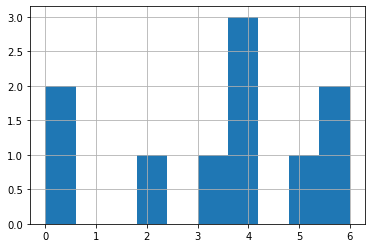

In [77]:
h = s.hist()

### 字符串方法

当 `Series` 或者 `DataFrame` 的某一列是字符串时，我们可以用 `.str` 对这个字符串数组进行字符串的基本操作： 

In [78]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

print(s.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## 合并

### 连接

In [79]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.477190,0.474403,0.441759,-1.541982
1,0.100660,1.050589,-0.476668,0.371736
2,-0.708880,0.093394,-0.489811,0.820312
3,-1.719851,0.767359,-0.108242,0.637253
4,1.142723,-0.498255,1.092781,-0.191692
5,-0.433055,0.315514,0.451953,1.263883
6,0.036724,-0.980194,0.851046,0.857887
7,1.333249,1.087420,-1.809464,0.429950
8,-1.084040,-0.910443,-0.467711,-0.093239
9,-0.186055,-2.348326,0.654666,-0.307851


可以使用 `pd.concat` 函数将多个 `pandas` 对象进行连接：

In [80]:
pieces = [df[:2], df[4:5], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,-0.477190,0.474403,0.441759,-1.541982
1,0.100660,1.050589,-0.476668,0.371736
4,1.142723,-0.498255,1.092781,-0.191692
7,1.333249,1.087420,-1.809464,0.429950
8,-1.084040,-0.910443,-0.467711,-0.093239
9,-0.186055,-2.348326,0.654666,-0.307851


### 数据库中的 Join

`merge` 可以实现数据库中的 `join` 操作：

In [81]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [82]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### append

向 `DataFrame` 中添加行：

In [83]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

df

,A,B,C,D
0,0.539014,1.367913,2.149890,0.297486
1,0.758937,0.346353,0.695128,1.994259
2,1.087300,1.552435,1.477772,-1.180227
3,-0.657937,-2.068016,-0.392507,-0.853410
4,-1.370281,-1.480300,-0.210933,-0.734074
5,0.762831,0.440834,1.336303,-0.907963
6,-0.860949,-0.523219,-0.814096,-1.598702
7,0.160576,-0.334343,-0.491057,-0.600479


将第三行的值添加到最后：

In [84]:
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,0.539014,1.367913,2.149890,0.297486
1,0.758937,0.346353,0.695128,1.994259
2,1.087300,1.552435,1.477772,-1.180227
3,-0.657937,-2.068016,-0.392507,-0.853410
4,-1.370281,-1.480300,-0.210933,-0.734074
5,0.762831,0.440834,1.336303,-0.907963
6,-0.860949,-0.523219,-0.814096,-1.598702
7,0.160576,-0.334343,-0.491057,-0.600479
8,-0.657937,-2.068016,-0.392507,-0.853410


### Grouping

In [85]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.255698,-0.204804
1,bar,one,0.997013,-0.889811
2,foo,two,-0.282028,0.312806
3,bar,three,1.595272,-1.085075
4,foo,two,1.009271,1.020723
5,bar,two,0.700614,-0.228229
6,foo,one,1.281484,-0.409890
7,foo,three,1.832907,0.725863


按照 `A` 的值进行分类：

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,3.292898,-2.203116
foo,3.585937,1.444698


按照 `A, B` 的值进行分类：

In [87]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.997013 -0.889811
    three  1.595272 -1.085075
    two    0.700614 -0.228229
foo one    1.025786 -0.614694
    three  1.832907  0.725863
    two    0.727244  1.333529

## 改变形状

### Stack

产生一个多 `index` 的 `DataFrame`：

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one     1.346837 -1.083800
      two    -0.385865 -0.033202
baz   one     2.948892  0.942314
      two    -1.798874 -1.222116
foo   one    -1.921688  1.035728
      two    -0.152426  2.073630
qux   one    -2.195979 -0.354062
      two    -1.313296 -0.290653

`stack` 方法将 `columns` 变成一个新的 `index` 部分：

In [89]:
df2 = df[:4]

stacked = df2.stack()

stacked

first  second   
bar    one     A    1.346837
               B   -1.083800
       two     A   -0.385865
               B   -0.033202
baz    one     A    2.948892
               B    0.942314
       two     A   -1.798874
               B   -1.222116
dtype: float64

可以使用 `unstack()` 将最后一级 `index` 放回 `column`：

In [90]:
stacked.unstack()

A         B
first second                    
bar   one     1.346837 -1.083800
      two    -0.385865 -0.033202
baz   one     2.948892  0.942314
      two    -1.798874 -1.222116

也可以指定其他的级别：

In [91]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.346837 -0.385865
      B -1.083800 -0.033202
baz   A  2.948892 -1.798874
      B  0.942314 -1.222116

## 时间序列

金融分析中常用到时间序列数据：

In [92]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.400761
2012-03-07   -0.294005
2012-03-08    0.559535
2012-03-09   -0.616336
2012-03-10    0.696618
Freq: D, dtype: float64

标准时间表示：

In [93]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00    0.400761
2012-03-07 00:00:00+00:00   -0.294005
2012-03-08 00:00:00+00:00    0.559535
2012-03-09 00:00:00+00:00   -0.616336
2012-03-10 00:00:00+00:00    0.696618
Freq: D, dtype: float64

改变时区表示：

In [94]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.400761
2012-03-06 19:00:00-05:00   -0.294005
2012-03-07 19:00:00-05:00    0.559535
2012-03-08 19:00:00-05:00   -0.616336
2012-03-09 19:00:00-05:00    0.696618
Freq: D, dtype: float64

## Categoricals

In [95]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


可以将 `grade` 变成类别：

In [96]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别的表示转化为有意义的字符：

In [97]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

添加缺失的类别：

In [98]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

使用 `grade` 分组：

In [99]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图

使用 `ggplot` 风格：

In [100]:
plt.style.use('ggplot')

`Series` 绘图：

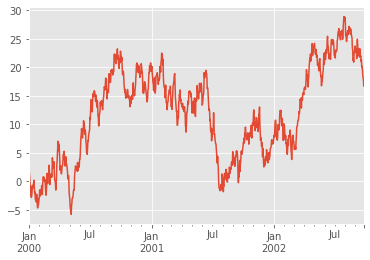

In [101]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

p = ts.cumsum().plot()

`DataFrame` 按照 `columns` 绘图：

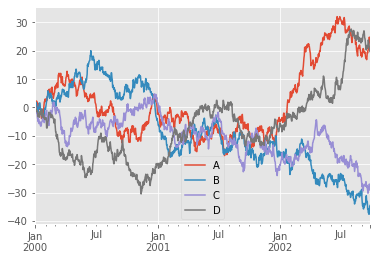

In [102]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df.cumsum().plot()
p = plt.legend(loc="best")

## Pandas 文件读写

### 操作csv文件

从csv文件中读取：

In [103]:
pd.read_csv('GZMTprice.csv')

,Unnamed: 0,open,close,low,high
0,2018-01-02,680.16,683.90,670.34,690.03
1,2018-01-03,681.62,695.57,679.91,700.95
2,2018-01-04,700.95,716.18,698.94,722.43
3,2018-01-05,720.00,717.43,707.58,724.89
4,2018-01-08,714.19,730.81,714.19,735.06
5,2018-01-09,730.89,760.34,730.89,760.81
6,2018-01-10,762.75,763.44,751.56,766.52
7,2018-01-11,764.70,752.85,750.12,765.67
8,2018-01-12,751.84,766.08,745.28,766.44
9,2018-01-15,770.97,763.11,756.94,776.41


保存写入csv文件：

In [104]:
df.to_csv('GZMTprice.csv')